In [ ]:
# Since we've got the correct path to the ratings dataset, let's preprocess it.
import pandas as pd
import json 

# Assuming your JSON data is stored in a file named 'data.json'
file_path = 'meta_Movies_and_TV.json'

# Read the file and convert each line into a Python dictionary
with open(file_path, 'r') as file:
    data = [json.loads(line) for line in file]


# Convert the list of dictionaries into a DataFrame
reviewsdf = pd.DataFrame(data)

# Read the ratings dataset
ratings_data = pd.read_csv('Movies_and_TV.csv', names=['asin', 'reviewerID', 'rating', 'unixtime'])

# Convert the unixtime to a human-readable date
ratings_data['date'] = pd.to_datetime(ratings_data['unixtime'], unit='s')

# Check for missing values
missing_values = ratings_data.isnull().sum()

# Remove any duplicates
ratings_data.drop_duplicates(inplace=True)

# Display the first few rows of the preprocessed ratings data and any missing values
ratings_data_head = ratings_data.head()
ratings_data_head, missing_values


: 

In [2]:
ratings_data

,asin,reviewerID,rating,unixtime,date
0,0001527665,A3478QRKQDOPQ2,5.0,1362960000,2013-03-11
1,0001527665,A2VHSG6TZHU1OB,5.0,1361145600,2013-02-18
2,0001527665,A23EJWOW1TLENE,5.0,1358380800,2013-01-17
3,0001527665,A1KM9FNEJ8Q171,5.0,1357776000,2013-01-10
4,0001527665,A38LY2SSHVHRYB,4.0,1356480000,2012-12-26
...,...,...,...,...,...
8765563,B01HJ6R77G,A29XKBB6SEYTN6,5.0,1491955200,2017-04-12
8765564,B01HJ6R77G,ASEBX8TBYWQWA,4.0,1472515200,2016-08-30
8765565,B01HJCCLOY,AK4XZBLSY1WC9,1.0,1495584000,2017-05-24
8765566,B01HJCCLOY,AK19IXB9I4175,3.0,1492041600,2017-04-13


In [3]:
reviewsdf = pd.DataFrame(data)

In [4]:
reviewsdf

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"[Movies & TV, Movies]",,[],,Understanding Seizures and Epilepsy,[],,,[],"886,503 in Movies & TV (",[],Movies & TV,,,,0000695009,[],[],NaN
1,"[Movies & TV, Movies]",,[],,Spirit Led&mdash;Moving By Grace In The Holy S...,[],,,[],"342,688 in Movies & TV (",[],Movies & TV,,,,0000791156,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
2,"[Movies & TV, Movies]",,[Disc 1: Flour Power (Scones; Shortcakes; Sout...,,My Fair Pastry (Good Eats Vol. 9),[],,Alton Brown,[],"370,026 in Movies & TV (",[],Movies & TV,,,,0000143529,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
3,"[Movies & TV, Movies]",,[Barefoot Contessa Volume 2: On these three di...,,"Barefoot Contessa (with Ina Garten), Entertain...","[B002I5GNW4, B005WXPVMM, B009UY3W8O, B00N27ID1...",,Ina Garten,[],"342,914 in Movies & TV (","[B002I5GNW4, 0804187045, B009UY3W8O, 060960219...",Movies & TV,,,$74.95,0000143588,[],[],NaN
4,"[Movies & TV, Movies]",,[Rise and Swine (Good Eats Vol. 7) includes bo...,,Rise and Swine (Good Eats Vol. 7),"[B000P1CKES, B000NR4CRM]",,Alton Brown,[],"351,684 in Movies & TV (",[B0015SVNXY],Movies & TV,,,,0000143502,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203761,"[Movies & TV, Studio Specials, Sony Pictures H...",,[Tony Award-winning director Bartlett Sher pro...,,Verdi: Otello,"[B01MXE4EVV, B014HFML6E, B07HGR7P4Z, B000F3T3C...",,Sonya Yoncheva,[],"68,026 in Movies & TV (","[B07BF2PQHM, B00012AST0, B0094AH3Q6, B0007P0LP...",Movies & TV,,,$14.98,B01HJ1INB0,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"{'Language:': 'English', 'Subtitles:': 'Italia..."
203762,"[Movies & TV, Movies]",,[Mr. Miracle DVD Region 2 need an all region D...,,Mr. Miracle - Ihn schickt der Himmel,[],,,[],"344,483 in Movies & TV (",[],Movies & TV,,,$16.18,B01HJ3E0PQ,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"{'Language:': 'German (Dolby Digital 5.1), Eng..."
203763,"[Movies & TV, Independently Distributed, Drama]",,[The President and his family rule the land wi...,,The President,"[B01M6DA5RJ, B0002F6BFG, B06XRGPHM3, B06XG2N43...",,Misha Gomiashvili,[],"199,854 in Movies & TV (","[B01GWCHP2U, B0009PW3RE]",Movies & TV,,,$18.99,B01HJ6R77G,[],[],"{'Language:': 'Georgian', 'Subtitles:': 'Engli..."
203764,"[Movies & TV, Genre for Featured Categories, A...",,"[Filmed in 1972 as Pope Joan, Michael Anderson...",,She.....Who Would Be Pope,[B004L690XW],,Liv Ullmann,[],"246,494 in Movies & TV (",[B0000C23HX],Movies & TV,,,,B01HJCCLOY,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"{'Language:': 'English', 'ASIN: ': 'B01HJCCLOY'}"


In [5]:
combined = pd.merge(ratings_data[['asin', 'reviewerID', 'rating']], reviewsdf[['asin', 'title']], on=['asin'], how='left')
combined.head(20)

,asin,reviewerID,rating,title
0,0001527665,A3478QRKQDOPQ2,5.0,Peace Child VHS
1,0001527665,A2VHSG6TZHU1OB,5.0,Peace Child VHS
2,0001527665,A23EJWOW1TLENE,5.0,Peace Child VHS
3,0001527665,A1KM9FNEJ8Q171,5.0,Peace Child VHS
4,0001527665,A38LY2SSHVHRYB,4.0,Peace Child VHS
5,0001527665,AHTYUW2H1276L,5.0,Peace Child VHS
6,0001527665,A3M3HCZLXW0YLF,5.0,Peace Child VHS
7,0001527665,A1OMHX76O2NC6V,1.0,Peace Child VHS
8,0001527665,A3OBOZ41IK6O1M,1.0,Peace Child VHS
9,0005089549,A2M1CU2IRZG0K9,5.0,Cathedral Quartet: A Reunion VHS


In [6]:
%matplotlib inline
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict, Counter

from surprise import Reader, Dataset, accuracy
from surprise import SVD, SVDpp, NMF, SlopeOne, NormalPredictor, KNNBaseline, KNNBasic
from surprise import KNNWithMeans, BaselineOnly, CoClustering

from surprise.model_selection import GridSearchCV, KFold
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate

In [7]:
# Create a smaller dataset by selecting the first 1000 rows
small_ratings_data = combined.head(50000)

# Initialize Surprise Reader and Dataset
reader = Reader(rating_scale=(1, 5))
data1 = Dataset.load_from_df(small_ratings_data[['asin', 'reviewerID', 'rating']], reader)


In [8]:
%%time

benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), 
                  KNNBaseline(), KNNBasic(), KNNWithMeans(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data1, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')    

<timed exec>:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


<timed exec>:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


<timed exec>:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


<timed exec>:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


<timed exec>:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Wall time: 2min 29s


<timed exec>:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,test_rmse,fit_time,test_time
Algorithm,,,
BaselineOnly,1.022461,0.091306,0.057847
SVD,1.023334,0.487221,0.067836
SVDpp,1.025483,33.117089,0.881494
KNNBaseline,1.031946,0.090931,0.076367
KNNWithMeans,1.084568,0.014641,0.082035
SlopeOne,1.087040,8.726848,0.363178
KNNBasic,1.090521,0.007004,0.077622
CoClustering,1.091252,2.511543,0.054965
NMF,1.100628,1.620182,0.066588


In [9]:
# Cross validate default algorithm
algo = SVD(n_factors=100,
            n_epochs=20,
            biased=True,
            init_mean=0,
            init_std_dev=0.1,
            lr_all=0.005,
            reg_all=0.02,
            lr_bu=None,
            lr_bi=None,
            lr_pu=None,
            lr_qi=None,
            reg_bu=None,
            reg_bi=None,
            reg_pu=None,
            reg_qi=None,
            random_state=10)
cross_validate(algo, data1, measures=['RMSE'], cv=3, verbose=False)

{'test_rmse': array([1.01119553, 1.02547699, 1.03444193]),
 'fit_time': (0.4740924835205078, 0.4291229248046875, 0.4353458881378174),
 'test_time': (0.08887720108032227, 0.06582403182983398, 0.06285786628723145)}

In [10]:
# Take random sample of ratings from dataset
np.random.seed(10)

# Shuffle the index of apr dataset for random split
idx = np.array(combined.index, dtype='int')
np.random.shuffle(idx)

# Start train-test-split with 80%-20% ratio
train = combined.loc[idx[:int(0.75*len(idx))],['reviewerID', 'title', 'rating']]
test = combined.loc[idx[int(0.75*len(idx)):],['reviewerID', 'title', 'rating']]

print("# of users in total:" , combined.reviewerID.nunique())
print("# of users in the training set: ", train.reviewerID.nunique())
print("# of products in total:" , combined.title.nunique())
print("# of products in the training set: ", train.title.nunique())

# of users in total: 3826085
# of users in the training set:  3221823
# of products in total: 177968
# of products in the training set:  166296


In [13]:
# Load trainset and testset into Surprise

# create a Reader object with the rating_scale from 1 to 5
# A reader is still needed but only the rating_scale param is required.
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
# Load trainset, note: the columns must correspond to user id, item id and ratings in the exact order
data_train = Dataset.load_from_df(train, reader)

# Prepare a trainset object out of the training data to feed to .fit() method
trainset = data_train.build_full_trainset()

# Load testset
data_test = Dataset.load_from_df(test, reader)

# Prepare a testset object out of the test data to feed to .test() method
testset = data_test.construct_testset(data_test.raw_ratings)

In [14]:
# Test default algorithm
algo = SVD(random_state=10)
predictions = algo.fit(trainset).test(testset)
print(accuracy.rmse(predictions))

RMSE: 1.0042
1.0041682298541827


In [57]:
print(accuracy.mae(predictions))

MAE:  0.9336
0.9335537739171719


In [15]:
# Test re-tuned algorithm
algo_tuned = SVD(n_factors=100, n_epochs=20, lr_all=0.007, reg_all=0.04, random_state=10)
predictions_tuned = algo_tuned.fit(trainset).test(testset)
print(accuracy.rmse(predictions_tuned))

RMSE: 0.9956
0.9956039845460232


In [56]:
print(accuracy.mae(predictions_tuned))

MAE:  0.7070
0.7069553562418469


In [ ]:
Anti_testset = trainset.build_anti_testset()
predictions_Anti = algo_tuned.test(Anti_testset)
print(accuracy.rmse(predictions_Anti))
print(accuracy.mae(predictions_Anti))


In [21]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0

# Create dataset for prediction evaluation
df = pd.DataFrame(predictions_tuned, columns=[ 'uid','iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

In [22]:
best_predictions = df[df['err'] >= 3].sort_values('err')[:10]
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
148747,AEJK5PLCUK6SX,Dial M for Murder VHS,2.0,5.0,{'was_impossible': False},21,486,3.0
2039967,AIE7SSIODDW2R,"Love Rain (Korean Drama)5DVD, 20 episodes, NTS...",2.0,5.0,{'was_impossible': False},7,25,3.0
7271,A30GOB0U7MRDQF,Doctor Who: Robot 1974 1963,2.0,5.0,{'was_impossible': False},34,68,3.0
2353121,AD1SBAUL6GNJT,The Kingdom VHS,2.0,5.0,{'was_impossible': False},3,55,3.0
1582314,A3QZXDBATXFNZX,Belleza Americana American Beauty VHS,2.0,5.0,{'was_impossible': False},32,1421,3.0
1789773,A1M5ZT35YX6TIN,The Mummy VHS,2.0,5.0,{'was_impossible': False},16,279,3.0
668255,A2GAKSDTJ9DME3,Doc Martin Series 1 Region 2,2.0,5.0,{'was_impossible': False},5,1641,3.0
819670,A3VKSWNEOHM9FR,Family Matters: Season 3,2.0,5.0,{'was_impossible': False},38,65,3.0
19669,AFDQ7QHDYES5E,A Christmas Story VHS,2.0,5.0,{'was_impossible': False},23,3773,3.0
876372,A2XTBI9BLFK2RF,Wall-E (Mandarin Chinese Edition),2.0,5.0,{'was_impossible': False},3,2542,3.0


In [24]:
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
666645,A3F57EJUB3VRH3,Role Models 2009 Seann William Scott; Paul Rud...,1.0,5.0,{'was_impossible': False},20,252,4.0
1958426,A28LFDIEUNH4GI,The Duchess,1.0,5.0,{'was_impossible': False},16,1737,4.0
1358072,A1OX3O1B6HKCUV,Bedknobs and Broomsticks VHS,1.0,5.0,{'was_impossible': False},3,775,4.0
1025822,A2JKJPZPBFL98Y,NYPD Blue: Season 6,1.0,5.0,{'was_impossible': False},1,601,4.0
1791350,A1WQ324CA4VTO1,Diff'rent Strokes - The Complete Second Season,1.0,5.0,{'was_impossible': False},24,62,4.0
1506239,A1QCS78EAWW7XR,Airwolf - The Complete Series,1.0,5.0,{'was_impossible': False},10,170,4.0
1113309,A30BQKQU5XGGS1,O.J.: Made in America 2,1.0,5.0,{'was_impossible': False},27,141,4.0
1899981,A1ZVZI3MNS3M2V,United States Of Tara: Season 3,1.0,5.0,{'was_impossible': False},34,241,4.0
1995953,A3KEQONY806ORT,Six Wives of Henry VIII / Elizabeth R,1.0,5.0,{'was_impossible': False},7,127,4.0
1557552,A1F8UH4FXV8A92,Hairspray VHS,1.0,5.0,{'was_impossible': False},4,265,4.0


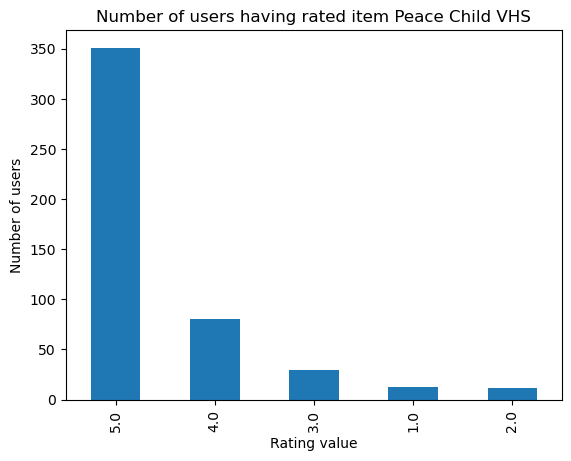

In [23]:
#Change the iid after training with total set

counter = Counter([r for (_, r) in trainset.ir[trainset.to_inner_iid('Dial M for Murder VHS')]])
pd.DataFrame.from_dict(counter, orient='index').plot(kind='bar', legend=False)
plt.xlabel('Rating value')
plt.ylabel('Number of users')
plt.title('Number of users having rated item Peace Child VHS')
plt.show()

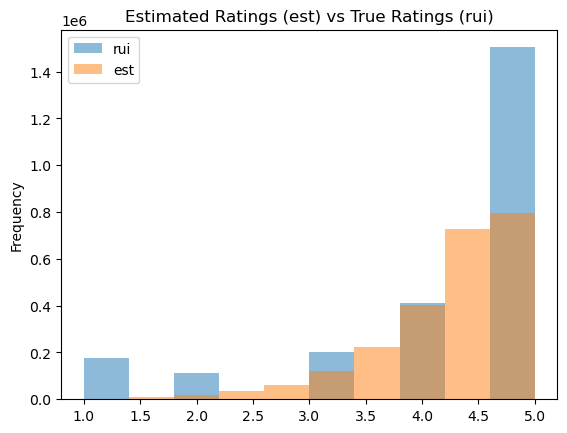

In [25]:
df[['rui', 'est']].plot(kind='hist', alpha=0.5)
plt.title('Estimated Ratings (est) vs True Ratings (rui)')
plt.show()

In [26]:
def get_top_n(predictions_tuned, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions_tuned:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n


In [27]:
# Find top n predictions
top_n = get_top_n(predictions_tuned, n=10)

# Print the recommended items for the first 5 users
counter = 0
for uid, user_ratings in top_n.items():
    if counter == 5:
        break
    print(uid, [iid for (iid, _) in user_ratings])
    counter += 1
    print('\n')

    
# Append recommended items for each user into a dictionary
top_items = {}
for uid, user_ratings in top_n.items():
    top_items[uid] = [iid for (iid, _) in user_ratings]



A3ON00CX6UBXOB ['The Twilight Saga - Breaking Dawn - Pt 2 Edizione: Regno Unito italien']


AOFLQH0VMBYL1 ['Curb Your Enthusiasm - The Complete First Four Seasons']


A3KJ3TASZIWNEJ ['Plan B', 'Those People', 'Free Fall', 'Date &amp; Switch', 'Layover', 'Romeos', 'Staying Together VHS', 'Daddy', 'What Happens Next', 'Tell No One']


A1M5FUM0GTZFQR ['X-Files: The Complete TV Series and Movie Collection', 'Suna no onna Woman in the Dunes  VHS', 'Bones: Season 7', ' Star Trek', 'These Three VHS', 'Alias: Season 3', 'Trooper Hook', 'Nights of Cabiria VHS', 'Always 2 - Sunset on Third Street', ' Humboldt County']


A28SPRSCEOVWWI ['Bubbe Meises Bubbe Stories VHS']




In [28]:
recommended_w_ratings = pd.DataFrame.from_dict(top_n, orient='index')
recommended_w_ratings.head()

,0,1,2,3,4,5,6,7,8,9
A3ON00CX6UBXOB,(The Twilight Saga - Breaking Dawn - Pt 2 Ediz...,None,None,None,None,None,None,None,None,None
AOFLQH0VMBYL1,(Curb Your Enthusiasm - The Complete First Fou...,None,None,None,None,None,None,None,None,None
A3KJ3TASZIWNEJ,"(Plan B, 5)","(Those People, 5)","(Free Fall, 5)","(Date &amp; Switch, 4.81669944092321)","(Layover, 4.81358380412111)","(Romeos, 4.812540561168276)","(Staying Together VHS, 4.694271658205116)","(Daddy, 4.693769847550662)","(What Happens Next, 4.625714176565498)","(Tell No One, 4.5971832482470125)"
A1M5FUM0GTZFQR,(X-Files: The Complete TV Series and Movie Col...,"(Suna no onna Woman in the Dunes VHS, 4.88039...","(Bones: Season 7, 4.812543367661044)","( Star Trek, 4.70959336505598)","(These Three VHS, 4.688810813532574)","(Alias: Season 3, 4.621770671519124)","(Trooper Hook, 4.571736258912488)","(Nights of Cabiria VHS, 4.564963789381135)","(Always 2 - Sunset on Third Street, 4.43241183...","( Humboldt County, 4.065592030568116)"
A28SPRSCEOVWWI,"(Bubbe Meises Bubbe Stories VHS, 4.01604334396...",None,None,None,None,None,None,None,None,None


In [29]:
recommended = pd.DataFrame.from_dict(top_items, orient='index')
recommended.head()

,0,1,2,3,4,5,6,7,8,9
A3ON00CX6UBXOB,The Twilight Saga - Breaking Dawn - Pt 2 Edizi...,None,None,None,None,None,None,None,None,None
AOFLQH0VMBYL1,Curb Your Enthusiasm - The Complete First Four...,None,None,None,None,None,None,None,None,None
A3KJ3TASZIWNEJ,Plan B,Those People,Free Fall,Date &amp; Switch,Layover,Romeos,Staying Together VHS,Daddy,What Happens Next,Tell No One
A1M5FUM0GTZFQR,X-Files: The Complete TV Series and Movie Coll...,Suna no onna Woman in the Dunes VHS,Bones: Season 7,Star Trek,These Three VHS,Alias: Season 3,Trooper Hook,Nights of Cabiria VHS,Always 2 - Sunset on Third Street,Humboldt County
A28SPRSCEOVWWI,Bubbe Meises Bubbe Stories VHS,None,None,None,None,None,None,None,None,None


In [30]:
def products_recommended(reviewerID):
    print('The top 10 product recommendations for user {} is:'.format(reviewerID))
    return recommended.loc[reviewerID]

def products_recommended_w_rating(reviewerID):
    number = 0
    print('The top 10 product recommendations with estimated ratings for user {} is:'.format(reviewerID))
    for rating in recommended_w_ratings.loc[reviewerID]:
        print(number,' ', rating[0], ' : ', rating[1])
        number += 1

In [31]:
#my boi 'A3478QRKQDOPQ2'
combined[combined.reviewerID == 'A3478QRKQDOPQ2'][
    ['reviewerID', 'asin', 'title','rating']]

,reviewerID,asin,title,rating
0,A3478QRKQDOPQ2,0001527665,Peace Child VHS,5.0
54216,A3478QRKQDOPQ2,0783225911,Rooster Cogburn,4.0
178064,A3478QRKQDOPQ2,078885996X,The Muppet Christmas Carol,4.0
219243,A3478QRKQDOPQ2,6300158683,Rain VHS,3.0
340752,A3478QRKQDOPQ2,6301640780,The Miracle of Marcelino VHS,1.0
435413,A3478QRKQDOPQ2,6302213304,Jungle Drums of Africa VHS,1.0
446750,A3478QRKQDOPQ2,6302274001,Wild Hearts Can't Be Broken VHS,3.0
569522,A3478QRKQDOPQ2,6303118127,Saint Joan VHS,4.0
813317,A3478QRKQDOPQ2,6304211740,Jane Eyre VHS,5.0
1064107,A3478QRKQDOPQ2,630573240X,The Sixth Sense VHS,3.0


In [36]:
recommended.head()

,0,1,2,3,4,5,6,7,8,9
A3ON00CX6UBXOB,The Twilight Saga - Breaking Dawn - Pt 2 Edizi...,None,None,None,None,None,None,None,None,None
AOFLQH0VMBYL1,Curb Your Enthusiasm - The Complete First Four...,None,None,None,None,None,None,None,None,None
A3KJ3TASZIWNEJ,Plan B,Those People,Free Fall,Date &amp; Switch,Layover,Romeos,Staying Together VHS,Daddy,What Happens Next,Tell No One
A1M5FUM0GTZFQR,X-Files: The Complete TV Series and Movie Coll...,Suna no onna Woman in the Dunes VHS,Bones: Season 7,Star Trek,These Three VHS,Alias: Season 3,Trooper Hook,Nights of Cabiria VHS,Always 2 - Sunset on Third Street,Humboldt County
A28SPRSCEOVWWI,Bubbe Meises Bubbe Stories VHS,None,None,None,None,None,None,None,None,None


In [34]:
products_recommended_w_rating('A3478QRKQDOPQ2')

The top 10 product recommendations with estimated ratings for user A3478QRKQDOPQ2 is:
0   Touched by an Angel: Season 8  :  4.03078239289202
1   Gone  :  3.6651529781356724
2   Gran Torino  :  3.639651038026172
3   Peace Child VHS  :  3.604098289289142
4   Reaching From Heaven  :  3.5719288495937476
5   Bamboo In Winter  :  3.5171483183461185
6   I Love Lucy: Season 1, Vol.6  :  3.3879513852253926
7   The Pretender / The Daylight Zone / Crime Of the Age  :  3.376563113770536
8   Pilgrim's Progress - The Immortal Story of Pilgrim's Journey to the Celestial City  :  3.3619258696166323
9   Climb a Tall Mountain VHS  :  3.3451336795163487


In [35]:
products_recommended('A3478QRKQDOPQ2')

The top 10 product recommendations for user A3478QRKQDOPQ2 is:


0                        Touched by an Angel: Season 8
1                                                 Gone
2                                          Gran Torino
3                                      Peace Child VHS
4                                 Reaching From Heaven
5                                     Bamboo In Winter
6                         I Love Lucy: Season 1, Vol.6
7    The Pretender / The Daylight Zone / Crime Of t...
8    Pilgrim's Progress - The Immortal Story of Pil...
9                            Climb a Tall Mountain VHS
Name: A3478QRKQDOPQ2, dtype: object

In [37]:
#Evaluating Product Recommendations for a Customer

In [39]:
def precision_recall_at_k(predictions_tuned, k=10, threshold=3.5):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions_tuned:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls


# Load full dataset
data = Dataset.load_from_df(combined[['reviewerID', 'asin', 'rating']], reader)
kf = KFold(n_splits=5)
algo = SVD(random_state=10)

print('Full Dataset \n')

number = 0
for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions_tuned, k=5, threshold=4)

    # Precision and recall can then be averaged over all users
    print('KFold Test #{}:'.format(number+1))
    print('Precision: {}'.format(sum(prec for prec in precisions.values()) / len(precisions)))
    print('Recall: {}'.format(sum(rec for rec in recalls.values()) / len(recalls)))
    print('\n')
    number += 1

Sampled 10000 Ratings 

KFold Test #1:
Precision: 0.9223250937668417
Recall: 0.8641948160156651


KFold Test #2:
Precision: 0.9223464618392903
Recall: 0.8641980112520732


KFold Test #3:
Precision: 0.9224052025135365
Recall: 0.8638809873359804


KFold Test #4:
Precision: 0.9223479080416341
Recall: 0.8638508874119581


KFold Test #5:
Precision: 0.9225106550554031
Recall: 0.864692299410979




In [41]:
# Load sampled 10000 ratings dataset

sample2 = combined.iloc[np.random.choice(combined.index, size=10000, replace=False)]

data = Dataset.load_from_df(sample2[['reviewerID', 'asin', 'rating']], reader)
kf = KFold(n_splits=5)
algo = SVD(random_state=10)

print('Sample 10000 Dataset \n')
number = 0
for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=4)

    # Precision and recall can then be averaged over all users
    print('KFold Test #{}:'.format(number+1))
    print('Precision: {}'.format(sum(prec for prec in precisions.values()) / len(precisions)))
    print('Recall: {}'.format(sum(rec for rec in recalls.values()) / len(recalls)))
    print('\n')
    number += 1

Full Dataset 

KFold Test #1:
Precision: 0.8167001003009027
Recall: 0.970912738214644


KFold Test #2:
Precision: 0.8087349397590361
Recall: 0.9706325301204819


KFold Test #3:
Precision: 0.7946920380570857
Recall: 0.9664496745117677


KFold Test #4:
Precision: 0.8343373493975904
Recall: 0.9754016064257028


KFold Test #5:
Precision: 0.8167587476979742
Recall: 0.9673530889000502




Estimating biases using als...
Computing the pearson_baseline similarity matrix...


MemoryError: Unable to allocate 247. GiB for an array with shape (182032, 182032) and data type float64